# Superstore Sales Dataset

## Background

Dataset ini berisi mengenai data sales retail dari global superstore selama 4 tahun. Dataset ini diambil dari platform Kaggle

Source
https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting?resource=download

## Dataset Information

Dataset ini terdiri dari `9800 entry data` dengan jumlah kolom sebanyak `18 kolom` yang terdiri sebagai berikut:

- Row ID = nilai unik berupa angka numerik berurutan
- Order ID = identitas unik setiap pesanan
- Order Date = tanggal setiap pesanan dibuat
- Ship Date = tanggal setiap pesanan dikirim
- Ship Mode = metode atau jenis pengiriman
- Customer ID = identitas unik setiap pelanggan
- Customer Name = nama pelanggan yang melakukan pembelian
- Segment = segmentasi pelanggan yang melakukan pembelian
- Country = negara asal pelanggan
- City = kota asal pelanggan
- State = state asal pelanggan
- Postal Code = kode pos asal pelanggan
- Region = pembagian wilayah asal pelanggan
- Product ID = identitas unik setiap produk
- Category = kategori umum dari setiap produk
- Sub-Category = kategori khusus dari setiap produk
- Product Name = nama setiap produk
- Sales = pendapatan dari setiap pembelian

# Pertanyaan Bisnis

**Overall Penjualan**
1. Bagaimana tren penjualan pada periode 4 tahun tersebut?
2. Bagaimana revenue penjualan pada periode 4 tahun tersebut?

**Pengemasan dan Pengiriman Barang**

3. Berapa lama total waktu pengemasan barang semenjak barang dipesan?
4. Metode atau jenis pengiriman apa yang paling sering digunakan oleh pelanggan?

**Demografi Pelanggan**

5. Jenis segmen pelanggan apa yang paling banyak dan sedikit melakukan pembelian?
6. Persebaran City, State, Region mana yang paling tinggi dan rendah dalam melakukan pembelian?

**Penjualan Produk**

7. Produk dengan kategori dan sub-category apa yang paling sering dan jarang dibeli oleh pelanggan?
8. Produk apa yang menyumbang revenue tertinggi dan menghasilkan revenue terendah?

# Import Library

In [74]:
import pandas as pd
import seaborn as sns
import numpy as mp
import matplotlib.pyplot as plt

print('library berhasil diimport')

library berhasil diimport


# Data Wrangling

## Gathering Data

In [88]:
# load dataset
sales_df = pd.read_csv('data/sales.csv')
sales_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


## Assessing Data

In [89]:
# cek info data
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

**Insight**
- Terdapat `9800 entries data` dan `17 kolom`
- Terdapat `missing value` pada kolom `postal code`
- Terdapat tipe data yang tidak sesuai pada kolom `order date` dan `ship date` 

In [90]:
# cek duplicate
duplicated = sales_df.duplicated().sum()
print('jumlah data duplikat: ', duplicated)

jumlah data duplikat:  0


**Insight**
- Tidak ditemukan adanya data yang duplikat pada dataset sales

In [91]:
# cek inaccurate
sales_df.describe(include='all')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
count,9800.000000,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9789.000000,9800,9800,9800,9800,9800,9800.000000
unique,NaN,4922,1230,1326,4,793,793,3,1,529,49,NaN,4,1861,3,17,1849,NaN
top,NaN,CA-2018-100111,05/09/2017,26/09/2018,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN
freq,NaN,14,38,34,5859,35,35,5101,9800,891,1946,NaN,3140,19,5909,1492,47,NaN
mean,4900.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55273.322403,NaN,NaN,NaN,NaN,NaN,230.769059
std,2829.160653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32041.223413,NaN,NaN,NaN,NaN,NaN,626.651875
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,NaN,NaN,0.444000
25%,2450.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,NaN,NaN,17.248000
50%,4900.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58103.000000,NaN,NaN,NaN,NaN,NaN,54.490000
75%,7350.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,NaN,NaN,210.605000


**Insight**
- Tidak ditemukan anomali pada dataset sales

**Kesimpulan Temuan**
- Terdapat `missing value` pada kolom `postal code`
- Terdapat tipe data yang tidak sesuai pada kolom `order date` dan `ship date` 

**Tambahan**
- Karena kolom `row id` dan `postal code` tidak akan digunakan dalam proses selanjutnya, maka untuk kedua kolom tersebut akan dihapus
- Karena nama kolom masih belum sesuai dengan standar (_) jadi kita akan mengubahnya terlebih dahulu
- Karena kita ingin menghitung jumlah waktu pengemasan barang, maka kita akan menambahkan kolom `Package Time`

## Cleaning Data

## Menghapus kolom `row id` dan `postal code`

In [92]:
# menghapus kolom row id
sales_df = sales_df.drop('Row ID', axis=1)
print('kolom berhasil dihapus')

kolom berhasil dihapus


In [93]:
# menghapus kolom postal code
sales_df = sales_df.drop('Postal Code', axis=1)
print('kolom berhasil dihapus')

kolom berhasil dihapus


In [94]:
# cek info 
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9800 non-null   object 
 1   Order Date     9800 non-null   object 
 2   Ship Date      9800 non-null   object 
 3   Ship Mode      9800 non-null   object 
 4   Customer ID    9800 non-null   object 
 5   Customer Name  9800 non-null   object 
 6   Segment        9800 non-null   object 
 7   Country        9800 non-null   object 
 8   City           9800 non-null   object 
 9   State          9800 non-null   object 
 10  Region         9800 non-null   object 
 11  Product ID     9800 non-null   object 
 12  Category       9800 non-null   object 
 13  Sub-Category   9800 non-null   object 
 14  Product Name   9800 non-null   object 
 15  Sales          9800 non-null   float64
dtypes: float64(1), object(15)
memory usage: 1.2+ MB


Terlihat untuk kolom `Row ID` dan `Postal Code` sudah terhapus terlihat dari informasi yang ditampilkan dan jumlah kolom saat ini menjadi `15 kolom`

## Mengubah Seluruh Nama Kolom

In [95]:
# mengubah seluruh nama kolom

# mengubah menjadi lowercase
sales_df.columns = sales_df.columns.str.lower()
# mengubah spasi menjadi _
sales_df.columns = sales_df.columns.str.replace(' ', '_')
# mengubah - menjadi _
sales_df.columns = sales_df.columns.str.replace('-', '_')

print('nama kolom berhasil diubah')


nama kolom berhasil diubah


In [96]:
# cek info data
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       9800 non-null   object 
 1   order_date     9800 non-null   object 
 2   ship_date      9800 non-null   object 
 3   ship_mode      9800 non-null   object 
 4   customer_id    9800 non-null   object 
 5   customer_name  9800 non-null   object 
 6   segment        9800 non-null   object 
 7   country        9800 non-null   object 
 8   city           9800 non-null   object 
 9   state          9800 non-null   object 
 10  region         9800 non-null   object 
 11  product_id     9800 non-null   object 
 12  category       9800 non-null   object 
 13  sub_category   9800 non-null   object 
 14  product_name   9800 non-null   object 
 15  sales          9800 non-null   float64
dtypes: float64(1), object(15)
memory usage: 1.2+ MB


## Mengubah tipe data pada kolom `Order Date` dan `Ship Date`

In [97]:
# mengubah tipe data object menjadi datetime
datetime_columns = ['order_date', 'ship_date']

for column in datetime_columns:
    sales_df[column] = pd.to_datetime(sales_df[column], dayfirst=True)

print('tipe data berhasil diubah')

tipe data berhasil diubah


In [98]:
# cek info data
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       9800 non-null   object        
 1   order_date     9800 non-null   datetime64[ns]
 2   ship_date      9800 non-null   datetime64[ns]
 3   ship_mode      9800 non-null   object        
 4   customer_id    9800 non-null   object        
 5   customer_name  9800 non-null   object        
 6   segment        9800 non-null   object        
 7   country        9800 non-null   object        
 8   city           9800 non-null   object        
 9   state          9800 non-null   object        
 10  region         9800 non-null   object        
 11  product_id     9800 non-null   object        
 12  category       9800 non-null   object        
 13  sub_category   9800 non-null   object        
 14  product_name   9800 non-null   object        
 15  sales          9800 n

Terlihat untuk kolom `Order Date` dan `Ship Date` sudah memiliki tipe data datetime

## Menambahkan kolom Package Time

In [99]:
# menambahkan kolom baru package_time
sales_df['package_time']=(sales_df['ship_date'] - sales_df['order_date']).dt.days
print('berhasil menambahkan kolom')

berhasil menambahkan kolom


In [100]:
# cek sample
sales_df.head()

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,region,product_id,category,sub_category,product_name,sales,package_time
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,3
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3
2,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,4
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,7
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,7


Terlihat kolom dan isi dari `package_time` sudah ditambahkan

# Exploratory Data Analysis (EDA)

## Melihat Rangkuman Data

In [101]:
# melihat rangkuman parameter statistik
sales_df.describe(include='all')

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,region,product_id,category,sub_category,product_name,sales,package_time
count,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800.000000,9800.000000
unique,4922,NaN,NaN,4,793,793,3,1,529,49,4,1861,3,17,1849,NaN,NaN
top,CA-2018-100111,NaN,NaN,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN,NaN
freq,14,NaN,NaN,5859,35,35,5101,9800,891,1946,3140,19,5909,1492,47,NaN,NaN
mean,NaN,2017-05-01 05:13:51.673469440,2017-05-05 04:17:52.653061120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,230.769059,3.961122
min,NaN,2015-01-03 00:00:00,2015-01-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.444000,0.000000
25%,NaN,2016-05-24 00:00:00,2016-05-27 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.248000,3.000000
50%,NaN,2017-06-26 00:00:00,2017-06-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.490000,4.000000
75%,NaN,2018-05-15 00:00:00,2018-05-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210.605000,5.000000
max,NaN,2018-12-30 00:00:00,2019-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22638.480000,7.000000


Berdasarkan informasi tersebut, kita memperoleh informasi bahwa penjualan terbesar berada di angka `$22.638` dan terendah berada di angka `$0.44`. Sedangkan untuk rata-rata penjualan berada di angka `$230`

Kemudian kita juga dapat melihat untuk durasi pengemasan barang, yaitu paling lama dikemas dalam `7 hari` dan paling cepat dikemas dalam `0 hari`. Sedangkan untuk rata-rata pengemasan barang ada di `4 hari`

## Melihat Performa Penjualan Berdasarkan Bulan dan Tahun

In [102]:
# memisahkan kolom order date menjadi bulan
sales_df['month'] = sales_df['order_date'].dt.to_period('M')

# mengelompokkan jumlah pembelian berdasarkan bulan
sales_df.groupby('month')['order_id'].nunique().reset_index()

,month,order_id
0,2015-01,30
1,2015-02,28
2,2015-03,69
3,2015-04,63
4,2015-05,68
5,2015-06,64
6,2015-07,64
7,2015-08,70
8,2015-09,129
9,2015-10,78


In [103]:
# memisahkan kolom order date menjadi tahun
sales_df['year'] = sales_df['order_date'].dt.to_period('Y')

# mengelompokkan jumlah pembelian berdasarkan tahun
sales_df.groupby('year')['order_id'].nunique().reset_index()

,year,order_id
0,2015,947
1,2016,1019
2,2017,1295
3,2018,1661


Berdasarkan informasi tersebut, kita memperoleh informasi bahwa jumlah pembelian mengalami kenaikan setiap tahun dengan tahun puncaknya di 2018

## Melihat Revenue Berdasarkan Bulan dan Tahun

In [104]:
# memisahkan kolom order date menjadi bulan
sales_df['month'] = sales_df['order_date'].dt.to_period('M')

# mengelompokkan revenue berdasarkan bulan
sales_df.groupby('month')['sales'].nunique().reset_index()

,month,sales
0,2015-01,76
1,2015-02,45
2,2015-03,153
3,2015-04,122
4,2015-05,120
5,2015-06,130
6,2015-07,140
7,2015-08,141
8,2015-09,259
9,2015-10,155


In [105]:
# memisahkan kolom order date menjadi tahun
sales_df['year'] = sales_df['order_date'].dt.to_period('Y')

# mengelompokkan revenue berdasarkan bulan
sales_df.groupby('year')['sales'].nunique().reset_index()

,year,sales
0,2015,1645
1,2016,1694
2,2017,2054
3,2018,2521


Berdasarkan informasi tersebut, kita mendapat informasi bahwa revenue penjualan mengalami pola kenaikan setiap tahun dengan puncaknya di tahun 2018

## Melihat Total Pengemasan dan Jenis Pengiriman

In [116]:
# melihat waktu total pengemasan barang
sales_df.groupby(by='package_time').order_id.count().sort_values(ascending=False).reset_index()

,package_time,order_id
0,4,2718
1,5,2147
2,2,1295
3,6,1170
4,3,978
5,7,615
6,0,514
7,1,363


Berdasarkan informasi tersebut, kita mendapat informasi bahwa pengemasan pesanan tertinggi yaitu dalam waktu `4 hari` dan terendah dalam waktu `0 hari`

In [117]:
# melihat metode/jenis pengiriman yang sering digunakan pelanggan
sales_df.groupby(by='ship_mode').order_id.count().sort_values(ascending=False).reset_index()

,ship_mode,order_id
0,Standard Class,5859
1,Second Class,1902
2,First Class,1501
3,Same Day,538


Berdasarkan informasi tersebut, kita mendapat informasi bahwa pelanggan sering untuk memakai metode atau jenis pengiriman `Standard Class` dan paling jarang memakai `Same Day`

## Melihat Segmen Pelanggan dan Demografi Pelanggan

In [118]:
# melihat segmen pelanggan
sales_df.groupby(by='segment').customer_id.nunique().sort_values(ascending=False).reset_index()

,segment,customer_id
0,Consumer,409
1,Corporate,236
2,Home Office,148


Berdasarkan informasi tersebut, kita mendapat informasi bahwa `pelanggan reguler` paling tinggi dalam melakukan pembelian

In [119]:
# melihat persebaran jumlah pelanggan berdasarkan kota
sales_df.groupby(by='city').customer_id.nunique().sort_values(ascending=False).reset_index()

,city,customer_id
0,New York City,349
1,Los Angeles,300
2,Philadelphia,237
3,San Francisco,230
4,Seattle,187
...,...,...
524,Wausau,1
525,Andover,1
526,West Allis,1
527,Altoona,1


In [120]:
# melihat persebaran jumlah pelanggan berdasarkan state
sales_df.groupby(by='state').customer_id.nunique().sort_values(ascending=False).reset_index()

,state,customer_id
0,California,570
1,New York,409
2,Texas,367
3,Pennsylvania,255
4,Illinois,231
5,Washington,223
6,Ohio,196
7,Florida,178
8,North Carolina,120
9,Virginia,107


In [121]:
# melihat persebaran jumlah pelanggan berdasarkan region
sales_df.groupby(by='region').customer_id.nunique().sort_values(ascending=False).reset_index()

,region,customer_id
0,West,681
1,East,669
2,Central,626
3,South,509


Berdasarkan informasi tersebut, kita mendapat informasi bahwa
- Persebaran pelanggan tertinggi ada di `kota New York City`, `state California`, `region West`
- Persebaran pelanggan terendah ada di `kota Aberdeen`, `state Wyoming`, `region south`

## Melihat Produk dan Kategori

In [122]:
# melihat kategori berdasarkan jumlah pembelian
sales_df.groupby(by='category').order_id.count().sort_values(ascending=False).reset_index()

,category,order_id
0,Office Supplies,5909
1,Furniture,2078
2,Technology,1813


In [123]:
# melihat sub kategori berdasarkan jumlah pembelian
sales_df.groupby(by='sub_category').order_id.count().sort_values(ascending=False).reset_index()

,sub_category,order_id
0,Binders,1492
1,Paper,1338
2,Furnishings,931
3,Phones,876
4,Storage,832
5,Art,785
6,Accessories,756
7,Chairs,607
8,Appliances,459
9,Labels,357


In [124]:
# melihat produk berdasarkan jumlah pembelian
sales_df.groupby(by='product_name').order_id.count().sort_values(ascending=False).reset_index()

,product_name,order_id
0,Staple envelope,47
1,Staples,46
2,Easy-staple paper,44
3,Avery Non-Stick Binders,20
4,Staple remover,18
...,...,...
1844,PNY Rapid USB Car Charger - Black,1
1845,Panasonic Business Telephones KX-T7736,1
1846,Panasonic KX MB2061 Multifunction Printer,1
1847,Pyle PRT45 Retro Home Telephone,1


Berdasarkan informasi tersebut, kita mendapat informasi bahwa
- Produk paling sering dibeli oleh pelanggan berdasarkan ketiga hal, yaitu `kategori Office Supplies`, `sub kategori Binders`, dan `produk Staple envelope`
- Produk paling jarang yang dibeli oleh pelanggan berdasarkan ketiga hal, yaitu `kategori Technology`, `sub kategori Copiers`, dan `produk AT&T EL51110 DECT`

In [125]:
# melihat revenue produk berdasarkan harga
sales_df.groupby(by='product_name').sales.sum().sort_values(ascending=False).reset_index()

,product_name,sales
0,Canon imageCLASS 2200 Advanced Copier,61599.824
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
2,Cisco TelePresence System EX90 Videoconferenci...,22638.480
3,HON 5400 Series Task Chairs for Big and Tall,21870.576
4,GBC DocuBind TL300 Electric Binding System,19823.479
...,...,...
1844,Acme Serrated Blade Letter Opener,7.632
1845,Grip Seal Envelopes,7.072
1846,Xerox 20,6.480
1847,Avery 5,5.760


Berdasarkan informasi tersebut, kita mendapat informasi bahwa produk yang menyumbang revenue tertinggi adalah `Canon imageCLASS 2200 Advanced Copier` dan paling rendah mendapatkan revenue adalah  `Eureka Disposable Bags`

# Visualization & Explanatory Analysis

## Bagaimana tren penjualan pada periode 4 tahun tersebut?

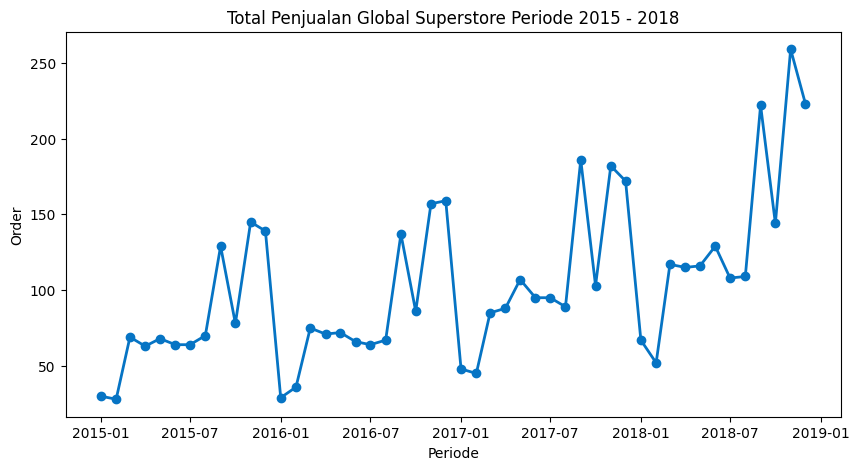

In [126]:
# memisahkan kolom order date menjadi bulan
sales_df['month'] = sales_df['order_date'].dt.to_period('M')

# mengelompokkan jumlah pembelian berdasarkan bulan
monthly_sales = sales_df.groupby('month').order_id.nunique().reset_index()
# mengubah periode ke timestamp agar dikenali matplotlib
monthly_sales['month'] = monthly_sales['month'].dt.to_timestamp()

# membuat visualisasinya
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_sales['month'],
    monthly_sales['order_id'],
    marker = 'o',
    linewidth = 2,
    color = '#0674C4'
)
plt.title('Total Penjualan Global Superstore Periode 2015 - 2018')
plt.xticks(fontsize = 10)
plt.xlabel('Periode')
plt.yticks(fontsize = 10)
plt.ylabel('Order')
plt.show()

**Insight**

Berdasarkan grafik tersebut menunjukkan bahwa secara umum penjualan menunjukkan tren peningkatan dari tahun 2015 hingga akhir tahun 2018. `Lonjakan tertinggi` penjualan terjadi pada `kuartal keempat di bulan Oktober - Desember` di setiap tahunnya. Walaupun terjadi lonjakan tinggi di kuartal keempat, pada `kuartal pertama di bulan Januari - Februari` mengalami `penurunan` yang signifikan di setiap tahunnya. Namun, jika dilihat secara keseluruhan, tren penjualan ini menunjukkan pertumbuhan yang positif

## Bagaimana revenue penjualan pada periode 4 tahun tersebut?

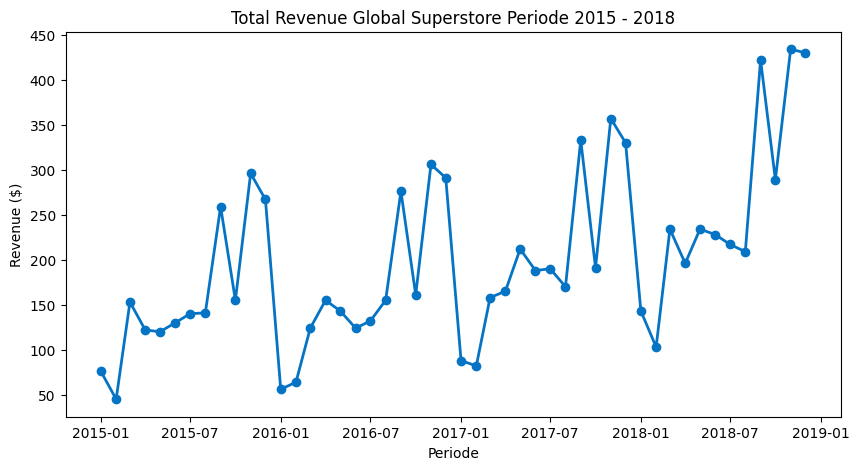

In [127]:
# memisahkan kolom order date menjadi bulan
sales_df['month'] = sales_df['order_date'].dt.to_period('M')

# mengelompokkan revenue berdasarkan bulan
monthly_revenue = sales_df.groupby('month').sales.nunique().reset_index()
# mengubah periode ke timestamp agar dikenali matplotlib
monthly_revenue['month'] = monthly_revenue['month'].dt.to_timestamp()

# membuat visualisasinya
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_revenue['month'],
    monthly_revenue['sales'],
    marker = 'o',
    linewidth = 2,
    color = '#0674C4'
)

plt.title('Total Revenue Global Superstore Periode 2015 - 2018')
plt.xticks(fontsize=10)
plt.xlabel('Periode')
plt.yticks(fontsize = 10)
plt.ylabel('Revenue ($)')
plt.show()

**Insight**

Berdasarkan grafik tersebut, secara umum revenue yang dihasilkan mengalami menunjukan tren peningkatan dari tahun 2015 sampai dengan tahun 2018. Tren ini memiliki pola yang hampir sama dengan tren penjualan pada grafik sebelumnya. `Lonjakan revenue` juga terjadi di `kuartal keempat di bulan Oktober-Desember` dan `penurunan tajam` di `kuartal pertama di bulan Januari - Februari` di setiap tahunnya. Walaupun terlihat adanya kenaikan dan penurunan pada musim-musim tertentu, secara keseluruhan tren revenue ini memiliki pertumbuhan yang positif.

## Berapa lama total waktu pengemasan barang semenjak barang dipesan?

C:\Users\Asrock\AppData\Local\Temp\ipykernel_7284\1601247227.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Asrock\AppData\Local\Temp\ipykernel_7284\1601247227.py:8: UserWarning: The palette list has more values (9) than needed (8), which may not be intended.
  sns.barplot(


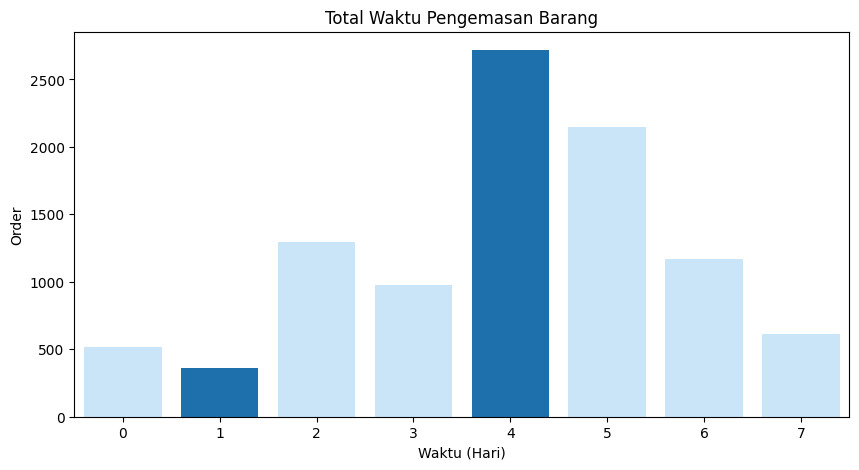

In [33]:
# melihat waktu total pengemasan barang
package_time = sales_df.groupby(by='package_time').order_id.count().reset_index()

# membuat visualisasi
colors = ["#C3E6FF", "#0674C4", "#C3E6FF", "#C3E6FF", "#0674C4", "#C3E6FF", "#C3E6FF","#C3E6FF","#C3E6FF"]
plt.figure(figsize = (10, 5))

sns.barplot(
    y = 'order_id',
    x = 'package_time',
    data = package_time.sort_values(by='order_id', ascending=False),
    palette = colors
)

plt.title('Total Waktu Pengemasan Barang')
plt.ylabel('Order')
plt.xlabel('Waktu (Hari)')
plt.tick_params(axis='x')
plt.show()

**Insight**

Berdasarkan grafik tersebut, terlihat waktu pengemasan barang bervariasi dari rentang `0 hari (same day) hingga 7 hari`. Grafik ini juga memperlihatkan total waktu paling tinggi dan rendah pengemasan barang. Terlihat waktu pengemasan barang `paling tinggi` dilakukan dalam waktu `4 hari` dan waktu pengemasan barang `paling rendah` dilakukan dalam waktu `1 hari`.

## Metode atau jenis pengiriman apa yang paling sering digunakan oleh pelanggan?

C:\Users\Asrock\AppData\Local\Temp\ipykernel_7284\1046057436.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


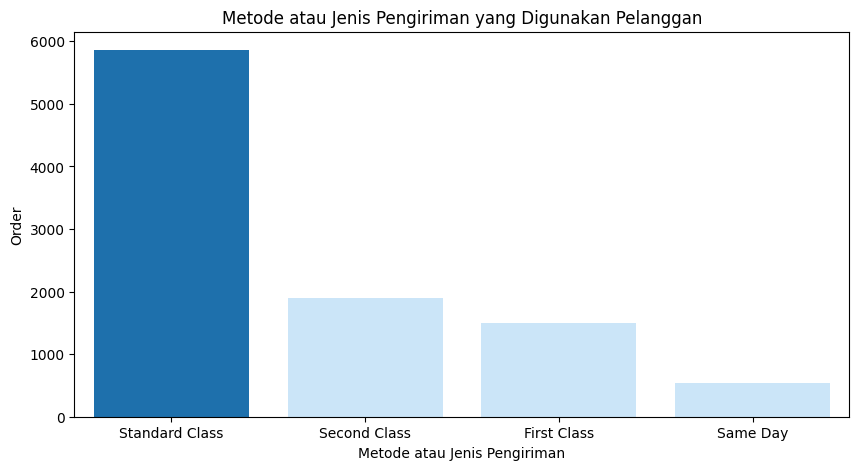

In [34]:
# melihat metode/jenis pengiriman yang sering digunakan pelanggan
method_deliver = sales_df.groupby(by='ship_mode').order_id.count().reset_index()

# membuat visualisasi
colors = ["#0674C4", "#C3E6FF", "#C3E6FF", "#C3E6FF"]
plt.figure(figsize = (10, 5))

sns.barplot(
    y = 'order_id',
    x = 'ship_mode',
    data = method_deliver.sort_values(by='order_id', ascending=False),
    palette = colors
)

plt.title('Metode atau Jenis Pengiriman yang Digunakan Pelanggan')
plt.ylabel('Order')
plt.xlabel('Metode atau Jenis Pengiriman')
plt.tick_params(axis='x')
plt.show()

**Insight**

Berdasarkan grafik tersebut, terlihat Superstore memberikan `4 pilihan metode atau jenis pengiriman`, yaitu Standard Class, Second Class, First Class, dan Same Day. Metode atau jenis pengiriman yang `paling sering digunakan pelanggan` adalah `Standard Class`. Sedangkan yang `paling jarang digunakan pelanggan` adalah `Same Day`

## Jenis segmen pelanggan apa yang paling banyak dan sedikit melakukan pembelian?

C:\Users\Asrock\AppData\Local\Temp\ipykernel_7284\1806162059.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


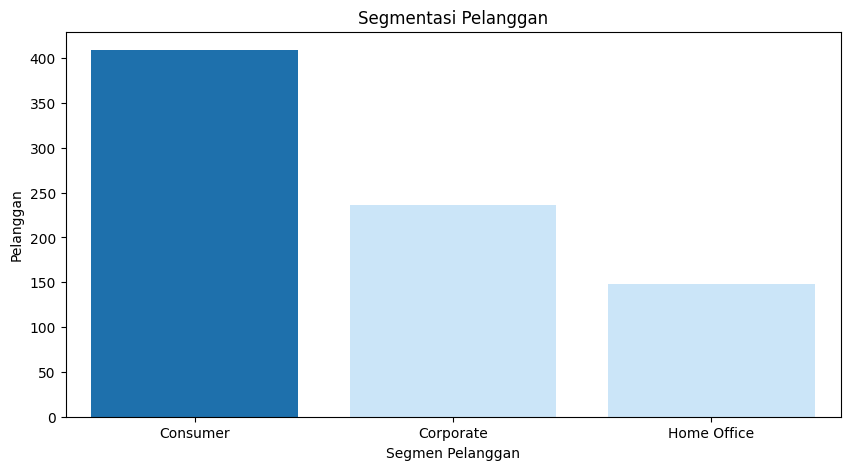

In [35]:
# melihat segmen pelanggan
segment = sales_df.groupby(by='segment').customer_id.nunique().reset_index()


# membuat visualisasi
colors = ["#0674C4", "#C3E6FF", "#C3E6FF"]
plt.figure(figsize = (10, 5))

sns.barplot(
    y = 'customer_id',
    x = 'segment',
    data = segment.sort_values(by='customer_id', ascending=False),
    palette = colors
)

plt.title('Segmentasi Pelanggan')
plt.ylabel('Pelanggan')
plt.xlabel('Segmen Pelanggan')
plt.tick_params(axis='x')
plt.show()

**Insight**

Berdasarkan grafik tersebut, terlihat bahwa Superstore memiliki `tiga segmentasi pelanggan`, yaitu Consumer, Corporate, dan Home Office. Di mana `segment Consumer` menempati `jumlah pelanggan terbanyak`, diikuti dengan `segment Corporate`, dan `paling sedikit` adalah `segmen Home Office`.

## Persebaran City, State, Region mana yang paling tinggi dan rendah dalam melakukan pembelian?

C:\Users\Asrock\AppData\Local\Temp\ipykernel_7284\2853141862.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Asrock\AppData\Local\Temp\ipykernel_7284\2853141862.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Asrock\AppData\Local\Temp\ipykernel_7284\2853141862.py:25: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


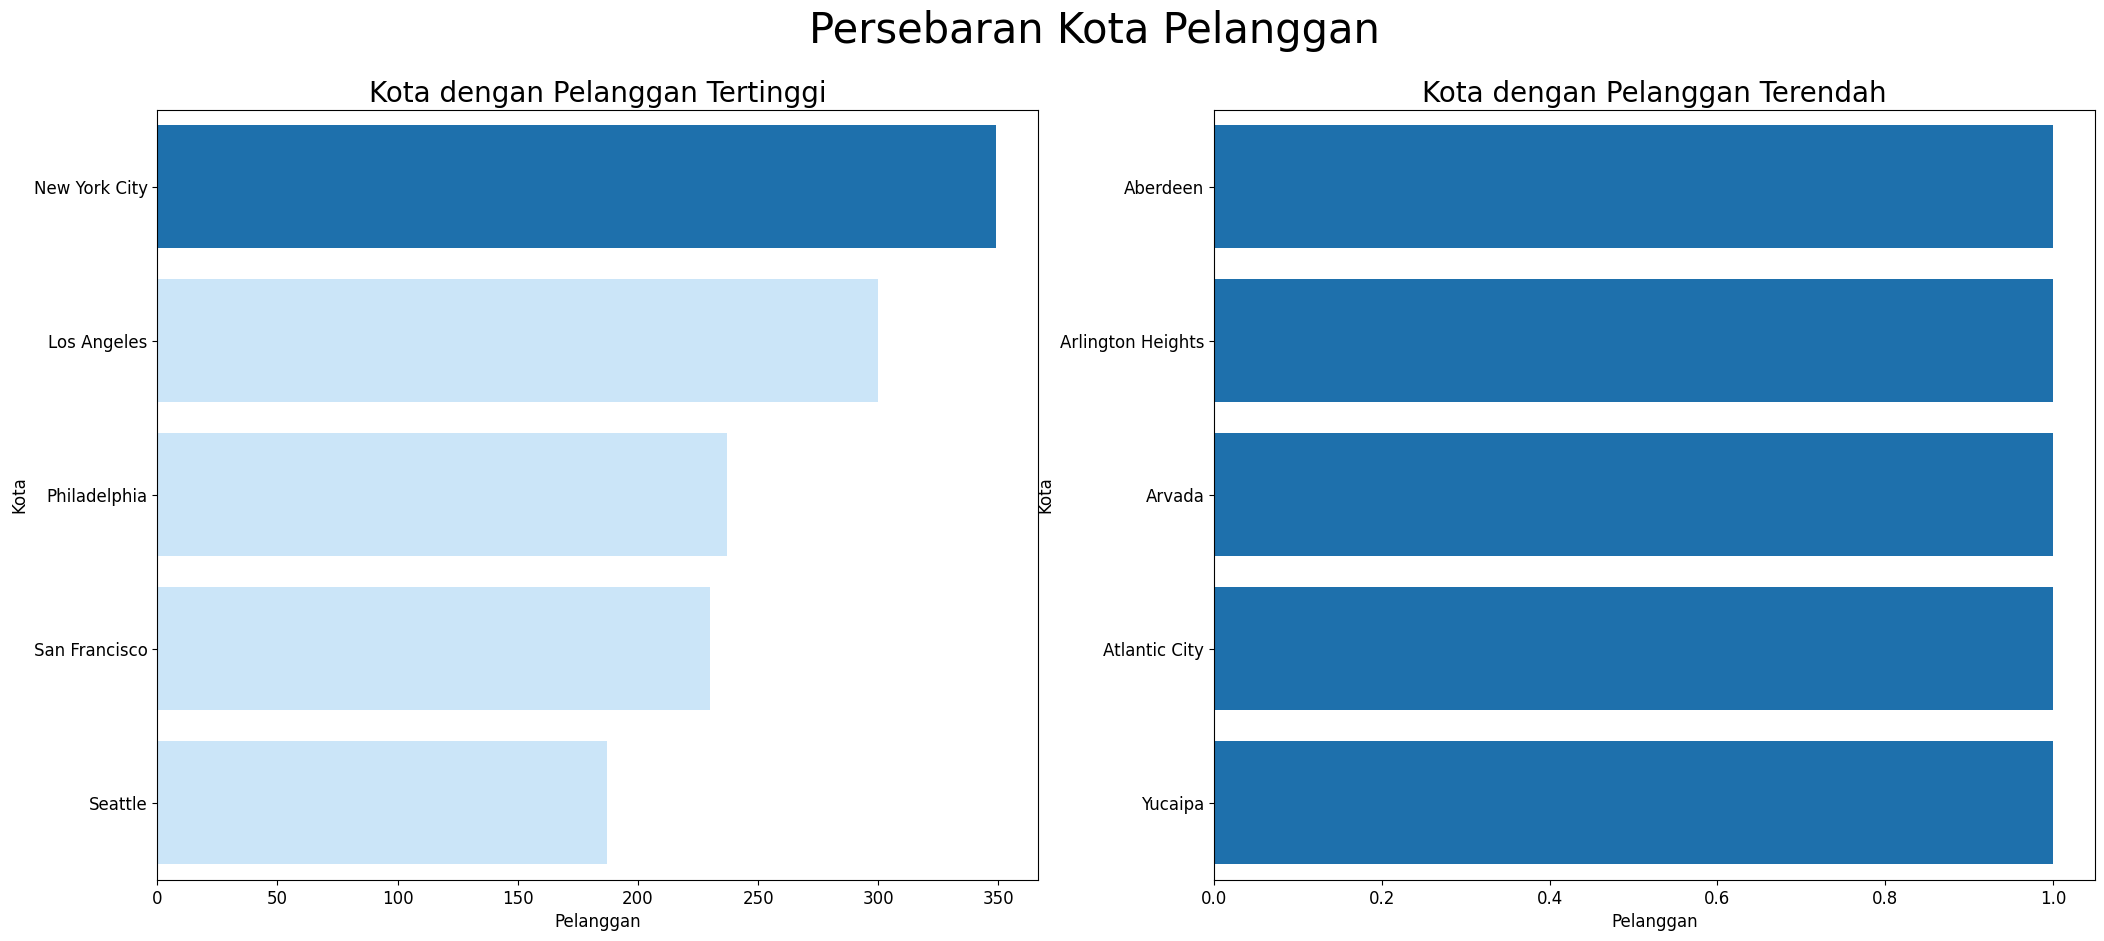

In [36]:
# melihat persebaran jumlah pelanggan berdasarkan kota
city = sales_df.groupby(by='city').customer_id.nunique().reset_index()

# membuat visualisasi
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(25, 10))
colors1 = ["#0674C4", "#C3E6FF", "#C3E6FF","#C3E6FF","#C3E6FF"]
colors2 = ["#0674C4"]

# visualisasi tertinggi
sns.barplot(
    y = 'city',
    x = 'customer_id',
    data = city.sort_values(by='customer_id', ascending=False).head(5),
    palette = colors1,
    ax = ax[0]
)
ax[0].set_ylabel('Kota', fontsize=12)
ax[0].set_xlabel('Pelanggan', fontsize=12)
ax[0].tick_params(axis='y', labelsize=12)
ax[0].tick_params(axis='x', labelsize=12)
ax[0].set_title('Kota dengan Pelanggan Tertinggi', fontsize=20)


# visualisasi terendah
sns.barplot(
    y = 'city',
    x = 'customer_id',
    data = city.sort_values(by='customer_id', ascending=True).head(5),
    palette = colors2,
    ax = ax[1]
)
ax[1].set_ylabel('Kota', fontsize=12)
ax[1].set_xlabel('Pelanggan', fontsize=12)
ax[1].tick_params(axis='y', labelsize=12)
ax[1].tick_params(axis='x', labelsize=12)
ax[1].set_title('Kota dengan Pelanggan Terendah', fontsize=20)

plt.suptitle('Persebaran Kota Pelanggan', fontsize=30)
plt.show()

**Insight**

Berdasarkan grafik tersebut, terlihat kota dengan `pelanggan tertinggi`, yaitu berasal dari kota `New York City`. Sedangkan untuk kota dengan `pelanggan terendah`, yaitu ada `beberapa kota` seperti `Aberdeen`, `Arlington Heights`, `Arvada`, `Atlantic City`, dan `Yucaipa`

C:\Users\Asrock\AppData\Local\Temp\ipykernel_7284\3786623052.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Asrock\AppData\Local\Temp\ipykernel_7284\3786623052.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


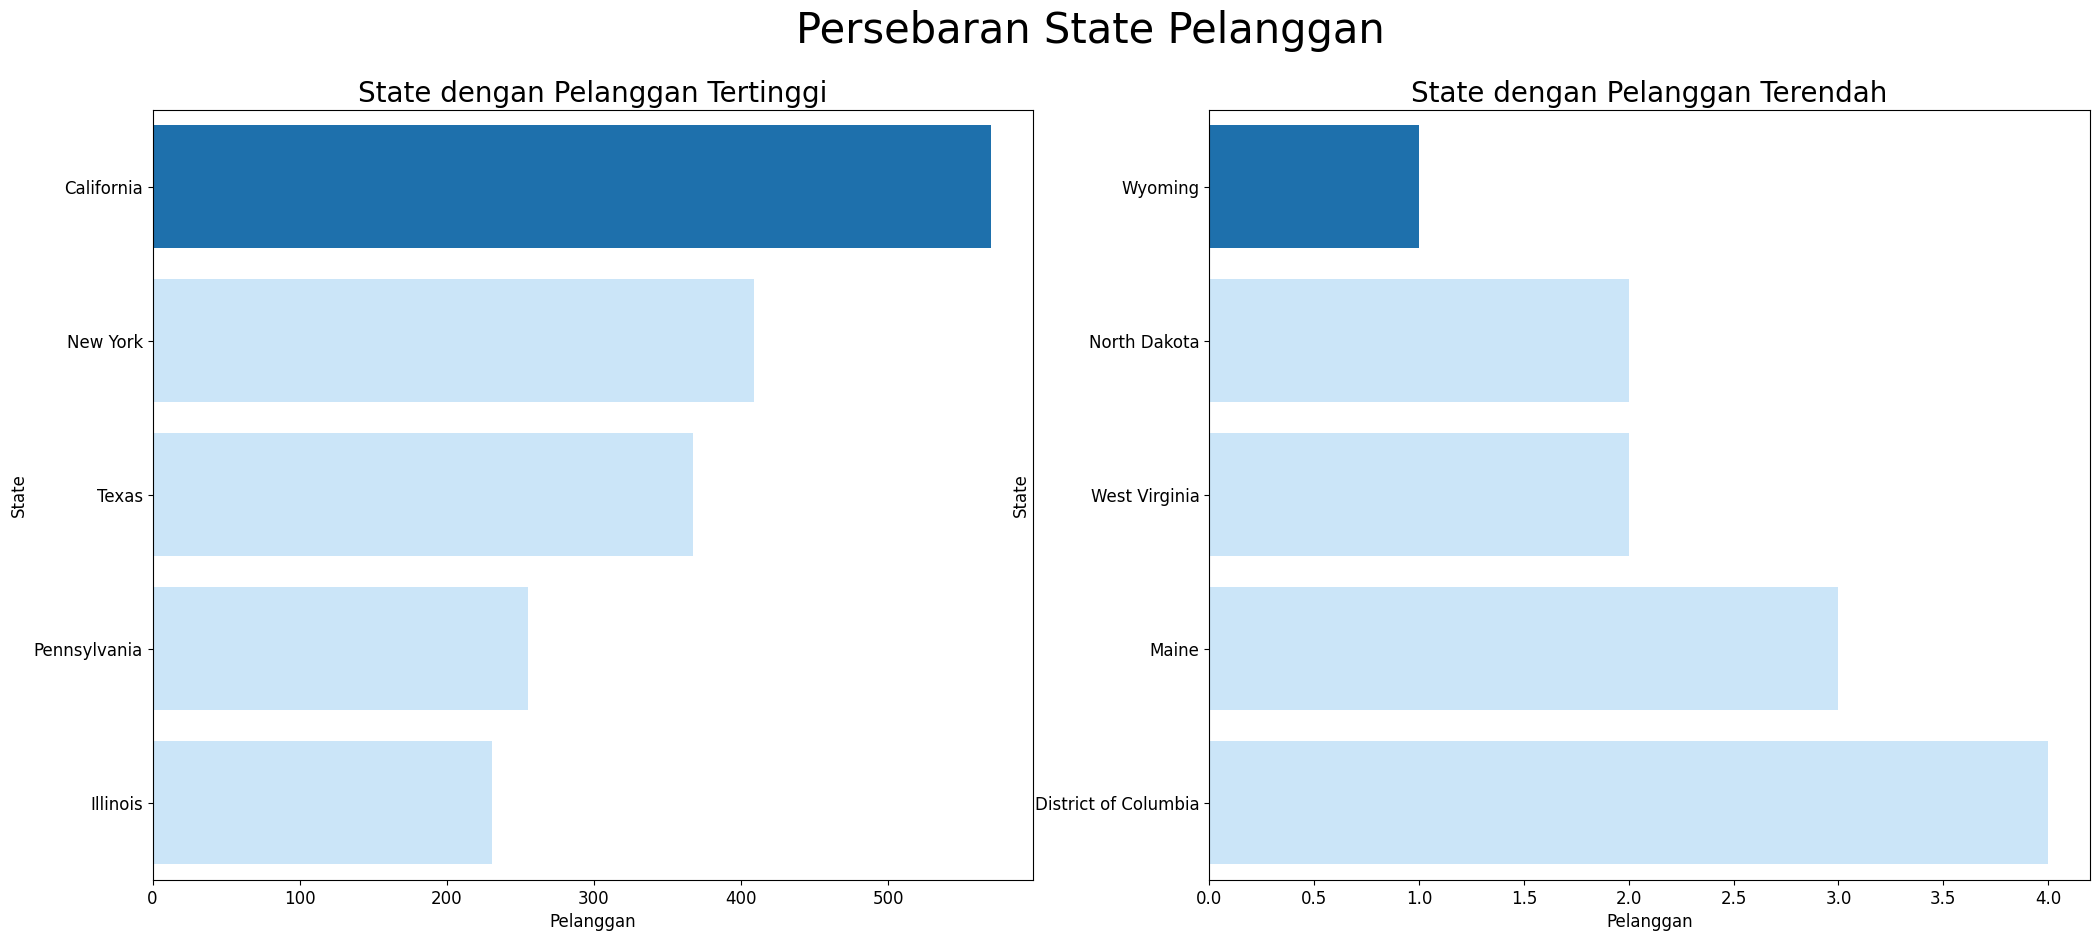

In [37]:
# melihat persebaran jumlah pelanggan berdasarkan state
state = sales_df.groupby(by='state').customer_id.nunique().reset_index()

# membuat visualisasi
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(25, 10))
colors = ["#0674C4", "#C3E6FF", "#C3E6FF","#C3E6FF","#C3E6FF"]

# visualisasi tertinggi
sns.barplot(
    y = 'state',
    x = 'customer_id',
    data = state.sort_values(by='customer_id', ascending=False).head(5),
    palette = colors,
    ax = ax[0]
)
ax[0].set_ylabel('State', fontsize=12)
ax[0].set_xlabel('Pelanggan', fontsize=12)
ax[0].tick_params(axis='y', labelsize=12)
ax[0].tick_params(axis='x', labelsize=12)
ax[0].set_title('State dengan Pelanggan Tertinggi', fontsize=20)


# visualisasi terendah
sns.barplot(
    y = 'state',
    x = 'customer_id',
    data = state.sort_values(by='customer_id', ascending=True).head(5),
    palette = colors,
    ax = ax[1]
)
ax[1].set_ylabel('State', fontsize=12)
ax[1].set_xlabel('Pelanggan', fontsize=12)
ax[1].tick_params(axis='y', labelsize=12)
ax[1].tick_params(axis='x', labelsize=12)
ax[1].set_title('State dengan Pelanggan Terendah', fontsize=20)

plt.suptitle('Persebaran State Pelanggan', fontsize=30)
plt.show()

**Insight**

Berdasarkan grafik tersebut, terlihat bahwa state dengan `pelanggan tertinggi` adalah `California`, kemudian untuk state dengan `pelanggan terendah` adalah `Wyoming`

In [38]:
# melihat persebaran jumlah pelanggan berdasarkan region
region = sales_df.groupby(by='region').customer_id.nunique().reset_index()

region.head()

,region,customer_id
0,Central,626
1,East,669
2,South,509
3,West,681


C:\Users\Asrock\AppData\Local\Temp\ipykernel_7284\3126256448.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


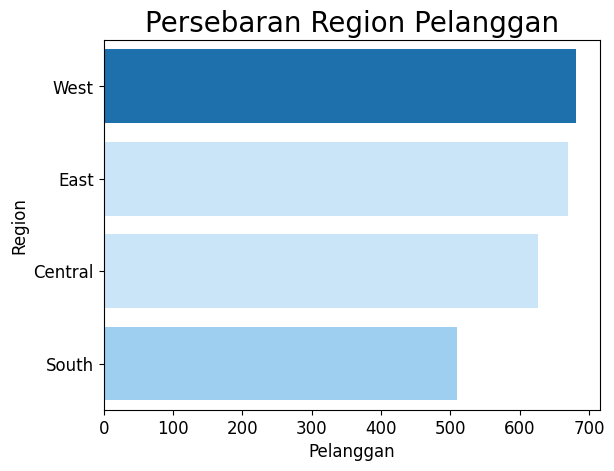

In [39]:
# melihat persebaran jumlah pelanggan berdasarkan region
region = sales_df.groupby(by='region').customer_id.nunique().reset_index()

# membuat visualisasi
colors = ["#0674C4", "#C3E6FF", "#C3E6FF","#91D0FD"]

# visualisasi tertinggi
sns.barplot(
    y = 'region',
    x = 'customer_id',
    data = region.sort_values(by='customer_id', ascending=False),
    palette = colors,
)
plt.ylabel('Region', fontsize=12)
plt.xlabel('Pelanggan', fontsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.tick_params(axis='x', labelsize=12)

plt.title('Persebaran Region Pelanggan', fontsize=20)
plt.show()

**Insight**

Berdasarkan grafik tersebut, pelanggan Superstore tersebar kedalam `4 region`, yaitu West, East, Central, dan South. Jika kita ingin membandingkan antara persebaran tertinggi dan terendah, persebaran `pelanggan tertinggi` ada di region `West` dan persebaran `pelanggan terendah` ada di region `South`

## Produk dengan kategori dan sub-kategori apa yang paling sering dan jarang dibeli oleh pelanggan?

C:\Users\Asrock\AppData\Local\Temp\ipykernel_7284\4057798875.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Asrock\AppData\Local\Temp\ipykernel_7284\4057798875.py:8: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(


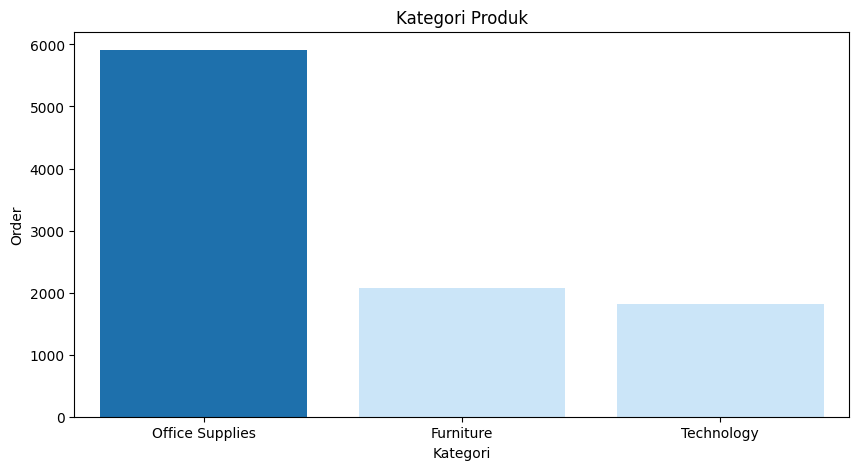

In [53]:
# melihat kategori berdasarkan jumlah pembelian
kategori = sales_df.groupby(by='category').order_id.count().reset_index()

# membuat visualisasi
colors = ["#0674C4", "#C3E6FF", "#C3E6FF"]
plt.figure(figsize=(10, 5))

sns.barplot(
    y = 'order_id',
    x = 'category',
    data = kategori.sort_values(by='order_id', ascending=False),
    palette = colors1
)

plt.title('Kategori Produk')
plt.ylabel('Order')
plt.xlabel('Kategori')
plt.show()

C:\Users\Asrock\AppData\Local\Temp\ipykernel_7284\2293721905.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Asrock\AppData\Local\Temp\ipykernel_7284\2293721905.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


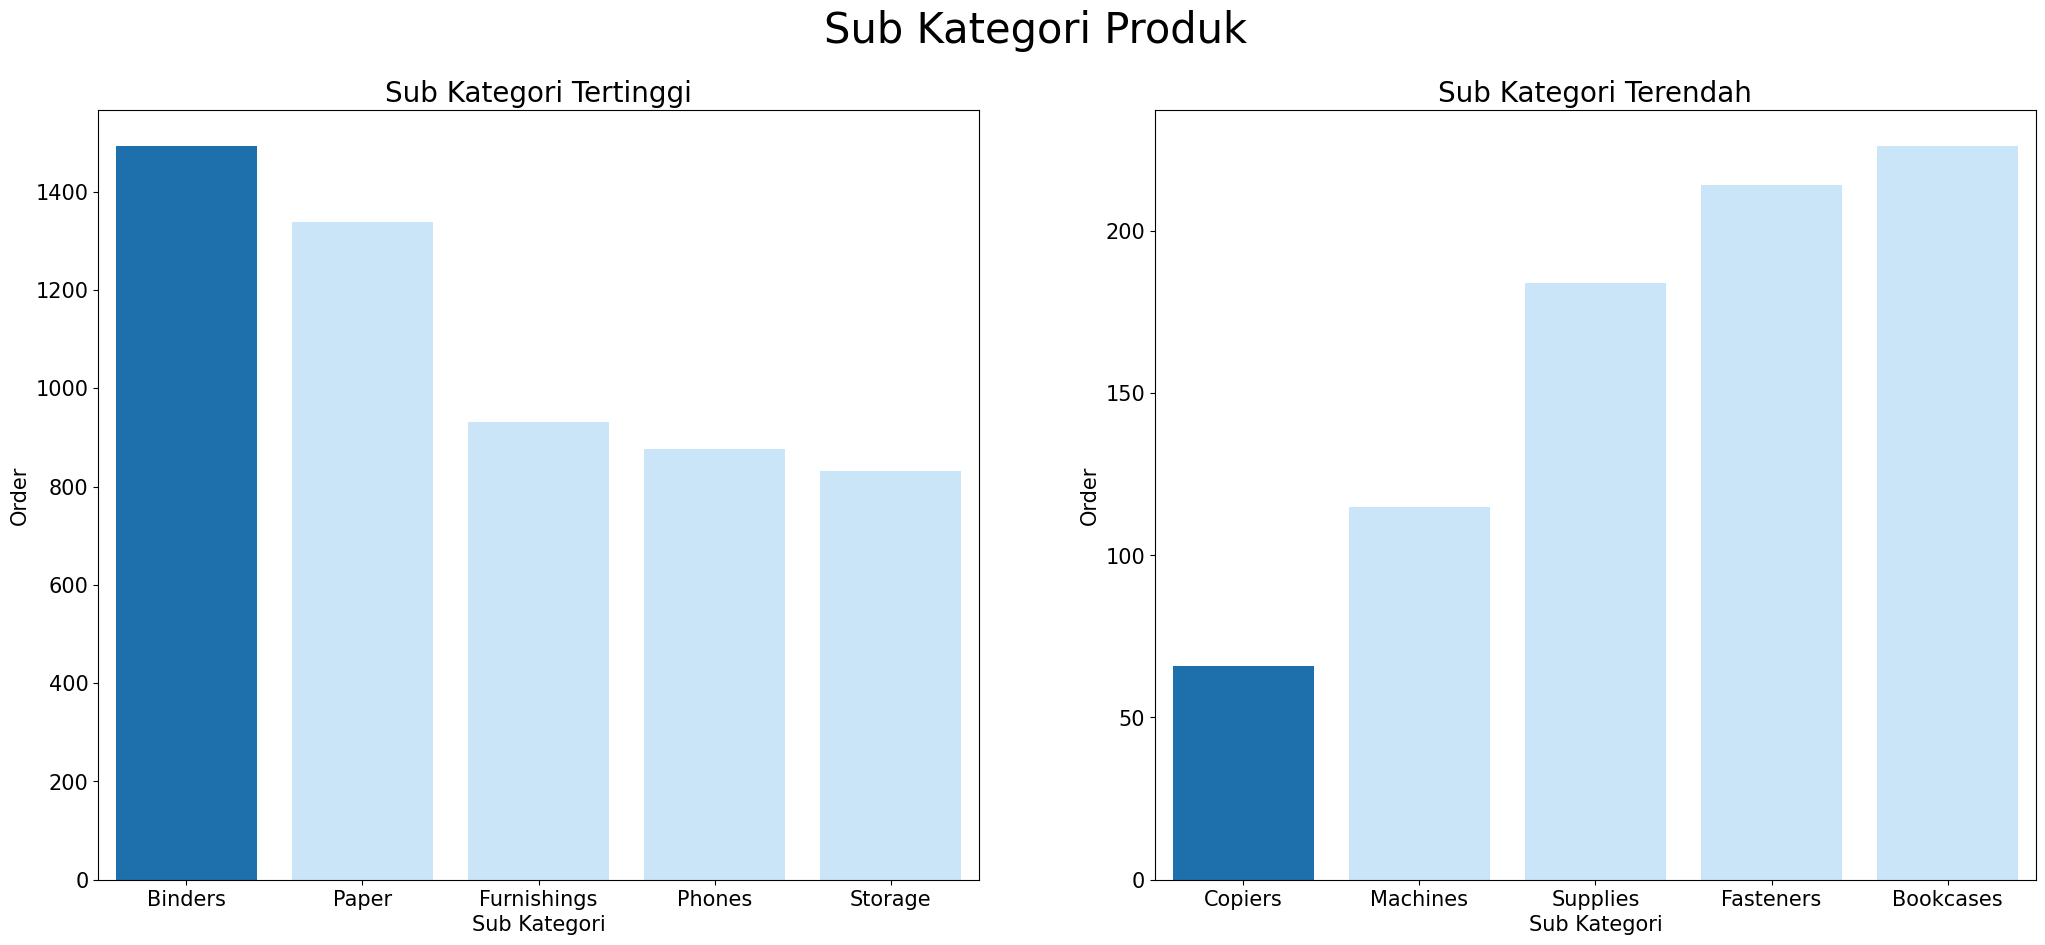

In [65]:
# melihat sub kategori berdasarkan jumlah pembelian
sub_category = sales_df.groupby(by='sub_category').order_id.count().reset_index()

# membuat visualisasi
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(25, 10))
colors = ["#0674C4", "#C3E6FF", "#C3E6FF","#C3E6FF","#C3E6FF"]

# visualisasi tertinggi
sns.barplot(
    y = 'order_id',
    x = 'sub_category',
    data = sub_category.sort_values(by='order_id', ascending=False).head(5),
    palette = colors,
    ax = ax[0]
)
ax[0].set_ylabel('Order', fontsize=15)
ax[0].set_xlabel('Sub Kategori', fontsize=15),
ax[0].tick_params(axis='y', labelsize=15)
ax[0].tick_params(axis='x', labelsize=15)
ax[0].set_title('Sub Kategori Tertinggi', fontsize=20)

# visualisasi terendah
sns.barplot(
    y = 'order_id',
    x = 'sub_category',
    data = sub_category.sort_values(by='order_id', ascending=True).head(5),
    palette = colors,
    ax = ax[1]
)
ax[1].set_ylabel('Order', fontsize=15)
ax[1].set_xlabel('Sub Kategori', fontsize=15),
ax[1].tick_params(axis='y', labelsize=15)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].set_title('Sub Kategori Terendah', fontsize=20)

plt.suptitle('Sub Kategori Produk', fontsize=30)
plt.show()


C:\Users\Asrock\AppData\Local\Temp\ipykernel_7284\1887370436.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


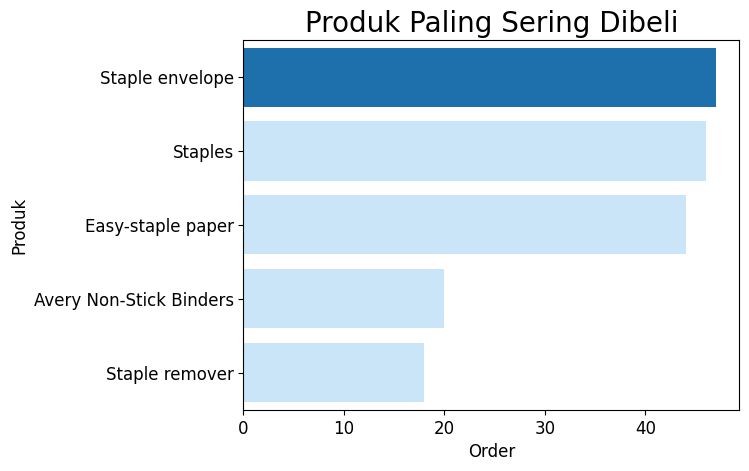

In [128]:
# melihat produk berdasarkan jumlah pembelian
product = sales_df.groupby(by='product_name').order_id.count().reset_index()

# membuat visualisasi
colors = ["#0674C4", "#C3E6FF", "#C3E6FF","#C3E6FF","#C3E6FF"]

# visualisasi tertinggi
sns.barplot(
    y = 'product_name',
    x = 'order_id',
    data = product.sort_values(by='order_id', ascending=False).head(5),
    palette=colors,
)

plt.ylabel('Produk', fontsize=12)
plt.xlabel('Order', fontsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.tick_params(axis='x', labelsize=12)

plt.title('Produk Paling Sering Dibeli', fontsize=20)
plt.show()

C:\Users\Asrock\AppData\Local\Temp\ipykernel_7284\990871680.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


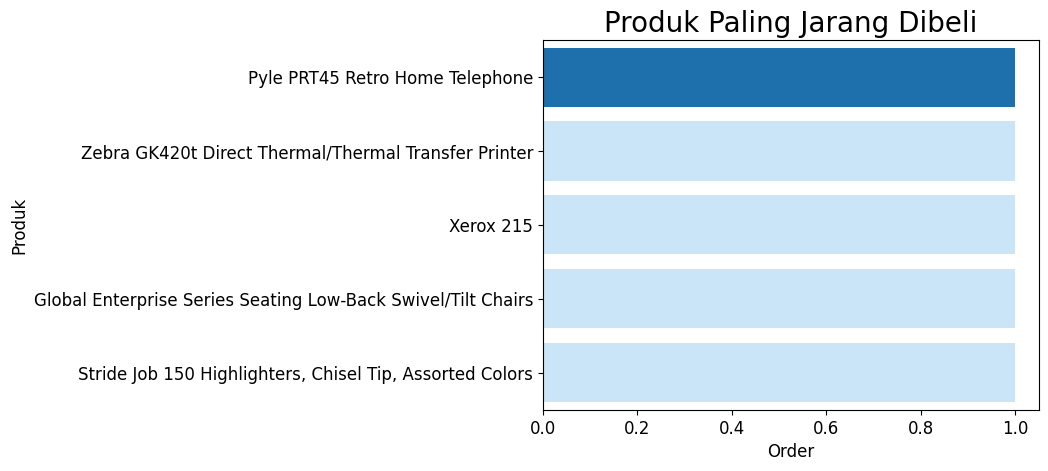

In [129]:
# melihat produk berdasarkan jumlah pembelian
product = sales_df.groupby(by='product_name').order_id.count().reset_index()

# membuat visualisasi
colors = ["#0674C4", "#C3E6FF", "#C3E6FF","#C3E6FF","#C3E6FF"]

# visualisasi terendah
sns.barplot(
    y = 'product_name',
    x = 'order_id',
    data = product.sort_values(by='order_id', ascending=True).head(5),
    palette=colors,
)

plt.ylabel('Produk', fontsize=12)
plt.xlabel('Order', fontsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.tick_params(axis='x', labelsize=12)

plt.title('Produk Paling Jarang Dibeli', fontsize=20)
plt.show()

**Insight**

Berdasarkan grafik tersebut, didapatkan beberapa wawasan diantaranya
- Kategori produk yang `paling sering dibeli` oleh pelanggan adalah `Office Suppliers` dan `paling jarang dibeli` oleh pelanggan adalah `Technology`
- Sub Kategori produk yang `paling sering dibeli` oleh pelanggan adalah `Binders` dan `paling jarang dibeli` oleh pelanggan adalah `Copiers`
- Kemudian untuk produk yang `paling sering dibeli` oleh pelanggan yaitu `Staple Envelope` dan yang `paling jarang dibeli` oleh pelanggan ada `beberapa produk` diantaranya `Pyle PRT45 Retro Home Telephone`, `Xerox 215`, `Global Enterprise Series Seating Low Back`

## Produk apa yang menyumbang revenue tertinggi dan menghasilkan revenue terendah?

C:\Users\Asrock\AppData\Local\Temp\ipykernel_7284\1335729967.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


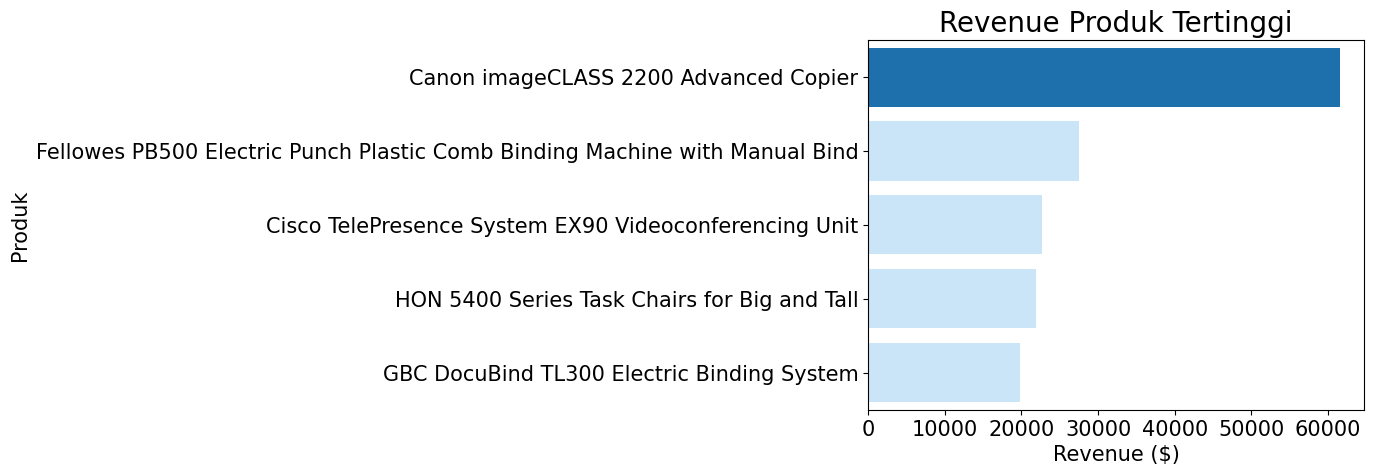

In [73]:
# melihat revenue produk berdasarkan harga
revenue_product = sales_df.groupby(by='product_name').sales.sum().reset_index()

# membuat visualisasi
colors = ["#0674C4", "#C3E6FF", "#C3E6FF","#C3E6FF","#C3E6FF"]

# visualisasi tertinggi
sns.barplot(
    y = 'product_name',
    x = 'sales',
    data = revenue_product.sort_values(by='sales', ascending=False).head(5),
    palette = colors,
)
plt.ylabel('Produk', fontsize=15)
plt.xlabel('Revenue ($)', fontsize=15),
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)
plt.title('Revenue Produk Tertinggi', fontsize=20)

plt.show()

C:\Users\Asrock\AppData\Local\Temp\ipykernel_7284\988693302.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


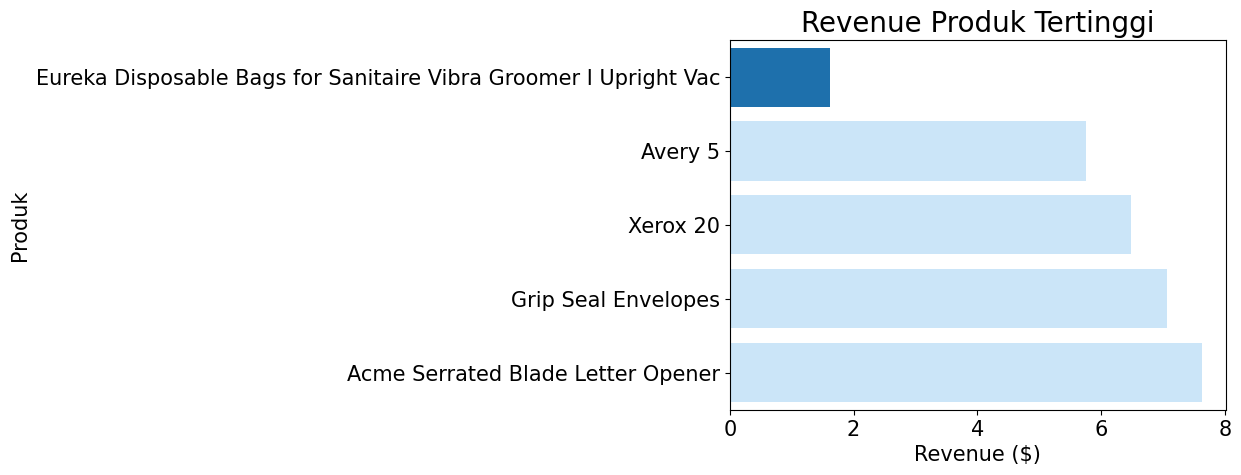

In [72]:
# melihat revenue produk berdasarkan harga
revenue_product = sales_df.groupby(by='product_name').sales.sum().reset_index()

# membuat visualisasi
colors = ["#0674C4", "#C3E6FF", "#C3E6FF","#C3E6FF","#C3E6FF"]

# visualisasi terendah
sns.barplot(
    y = 'product_name',
    x = 'sales',
    data = revenue_product.sort_values(by='sales', ascending=True).head(5),
    palette = colors,
)
plt.ylabel('Produk', fontsize=15)
plt.xlabel('Revenue ($)', fontsize=15),
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)
plt.title('Revenue Produk Tertinggi', fontsize=20)

plt.show()

**Insight**

Berdasarkan dua grafik tersebut, didapatkan wawasan mengenai revenue yang dihasilkan dari produk. Untuk `revenue produk tertinggi` dihasilkan oleh produk `Canon imageCLASS 2200 Advanced Copier`. Sedangkan untuk `revenue produk terendah` dihasilkan oleh produk `Eureka Disposable Bags`.

# Conclusion

## Pertanyaan 1

**Bagaimana tren penjualan pada periode 4 tahun tersebut?**


Berdasarkan wawasan yang diperoleh, menunjukkan bahwa secara umum penjualan menunjukkan tren peningkatan dari tahun 2015 hingga akhir tahun 2018. `Lonjakan tertinggi` penjualan terjadi pada `kuartal keempat di bulan Oktober - Desember` di setiap tahunnya. Walaupun terjadi lonjakan tinggi di kuartal keempat, pada `kuartal pertama di bulan Januari - Februari` mengalami `penurunan` yang signifikan di setiap tahunnya. Namun, jika dilihat secara keseluruhan, tren penjualan ini menunjukkan pertumbuhan yang positif

## Pertanyaan 2
**Bagaimana revenue penjualan pada periode 4 tahun tersebut?**

Berdasarkan wawasan yang diperoleh, secara umum revenue yang dihasilkan mengalami menunjukan tren peningkatan dari tahun 2015 sampai dengan tahun 2018. Tren ini memiliki pola yang hampir sama dengan tren penjualan pada grafik sebelumnya. `Lonjakan revenue` juga terjadi di `kuartal keempat di bulan Oktober-Desember` dan `penurunan tajam` di `kuartal pertama di bulan Januari - Februari` di setiap tahunnya. Walaupun terlihat adanya kenaikan dan penurunan pada musim-musim tertentu, secara keseluruhan tren revenue ini memiliki pertumbuhan yang positif.


## Pertanyaan 3
**Berapa lama total waktu pengemassan barang semenjak barang dipesan?**


Berdasarkan wawasan yang diperoleh, terlihat waktu pengemasan barang bervariasi dari rentang `0 hari (same day) hingga 7 hari`. Grafik ini juga memperlihatkan total waktu paling tinggi dan rendah pengemasan barang. Terlihat waktu pengemasan barang `paling tinggi` dilakukan dalam waktu `4 hari` dan waktu pengemasan barang `paling rendah` dilakukan dalam waktu `1 hari`.

## Pertanyaan 4
**Metode atau jenis pengiriman apa yang paling sering digunakan oleh pelanggan?**


Berdasarkan wawasan yang diperoleh, terlihat Superstore memberikan `4 pilihan metode atau jenis pengiriman`, yaitu Standard Class, Second Class, First Class, dan Same Day. Metode atau jenis pengiriman yang `paling sering digunakan pelanggan` adalah `Standard Class`. Sedangkan yang `paling jarang digunakan pelanggan` adalah `Same Day`

## Pertanyaan 5
**Jenis segmen pelanggan apa yang paling banyak dan sedikit melakukan pembelian?**


Berdasarkan wawasan yang diperoleh, terlihat bahwa Superstore memiliki `tiga segmentasi pelanggan`, yaitu Consumer, Corporate, dan Home Office. Di mana `segment Consumer` menempati `jumlah pelanggan terbanyak`, diikuti dengan `segment Corporate`, dan `paling sedikit` adalah `segmen Home Office`.

## Pertanyaan 6
**Persebaran City, State, Region mana yang paling tinggi dan rendah dalam melakukan pembelian?**

Berdasarkan wawasan yang diperoleh, dapat disimpulkan bahwa
- Terlihat kota dengan `pelanggan tertinggi`, yaitu berasal dari kota `New York City`. Sedangkan untuk kota dengan `pelanggan terendah`, yaitu ada `beberapa kota` seperti `Aberdeen`, `Arlington Heights`, `Arvada`, `Atlantic City`, dan `Yucaipa`
- Terlihat bahwa state dengan `pelanggan tertinggi` adalah `California`, kemudian untuk state dengan `pelanggan terendah` adalah `Wyoming`
- Terlihat bahwa pelanggan Superstore tersebar kedalam `4 region`, yaitu West, East, Central, dan South. Jika kita ingin membandingkan antara persebaran tertinggi dan terendah, persebaran `pelanggan tertinggi` ada di region `West` dan persebaran `pelanggan terendah` ada di region `South`

## Pertanyaan 7
**Produk dengan kategori dan sub-kategori apa yang paling sering dan jarang dibeli oleh pelanggan?**

Berdasarkan wawasan yang diperoleh, dapat disimpulkan bahwa
- Kategori produk yang `paling sering dibeli` oleh pelanggan adalah `Office Suppliers` dan `paling jarang dibeli` oleh pelanggan adalah `Technology`
- Sub Kategori produk yang `paling sering dibeli` oleh pelanggan adalah `Binders` dan `paling jarang dibeli` oleh pelanggan adalah `Copiers`
- Kemudian untuk produk yang `paling sering dibeli` oleh pelanggan yaitu `Staple Envelope` dan yang `paling jarang dibeli` oleh pelanggan ada `beberapa produk` diantaranya `Pyle PRT45 Retro Home Telephone`, `Xerox 215`, `Global Enterprise Series Seating Low Back`

## Pertanyaan 8
**Produk apa yang menyumbang revenue tertinggi dan menghasilkan revenue terendah?**

Berdasarkan wawasan yang diperoleh, untuk `revenue produk tertinggi` dihasilkan oleh produk `Canon imageCLASS 2200 Advanced Copier`. Sedangkan untuk `revenue produk terendah` dihasilkan oleh produk `Eureka Disposable Bags`.